- Do Rooms Get Booked More Frequently on the Weekends? In other words, are there fewer available rooms on the weekends?
- Do Rooms Get with a View Get Booked More Frequently on Weekends?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

FilePathRoot = "C:\\Users\\USBennetDa2\\OneDrive - NESTLE\\Udacity Data Science Nanodegree\\Project 1"

In [80]:
CalendarCleaned = pd.read_csv(FilePathRoot + "\\CalendarCleaned.csv")
# Convert 'date' column from string to float
CalendarCleaned[["date"]] = pd.to_datetime(CalendarCleaned["date"])
#Identify if the date was a weekend (Friday [4] or Saturday [5]). A 1 means it's a Fri/Sat, a 0 means it's not.
CalendarCleaned["WeekDay"] = CalendarCleaned["date"].dt.day_name()#dayofweek#.isin([4,5]).astype("int")

CalendarCleaned.head(7)

,listing_id,date,available,price,WeekDay
0,241032,2016-01-04,1,85.0,Monday
1,241032,2016-01-05,1,85.0,Tuesday
2,241032,2016-01-06,0,NaN,Wednesday
3,241032,2016-01-07,0,NaN,Thursday
4,241032,2016-01-08,0,NaN,Friday
5,241032,2016-01-09,0,NaN,Saturday
6,241032,2016-01-10,0,NaN,Sunday


In [114]:
#CalendarCleaned.nunique()

grouped1 = CalendarCleaned.drop(["date", "price"], axis = 1).groupby(["available", "WeekDay"]).count()
grouped2 = CalendarCleaned.drop(["date", "price", "available"], axis = 1).groupby(["WeekDay"]).count()
#print(grouped1)
#print(grouped2)

 #Solution on joining multi index and single index found here: https://stackoverflow.com/questions/50477220/join-on-multiindex-with-different-number-of-levels-in-pandas
df = grouped1.merge(grouped2, left_on = grouped1.index.get_level_values('WeekDay').values, right_index=True, suffixes = ('_PerAvailable', '_Total')).query("available == 1").droplevel(0)
df["Percentage"] = df["listing_id_PerAvailable"]/df["listing_id_Total"]
df.drop(labels = ["key_0", "listing_id_PerAvailable", "listing_id_Total"], axis = 1, inplace = True)
df = df.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])#)#, ) #["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df

,Percentage
WeekDay,
Monday,0.671101
Tuesday,0.671954
Wednesday,0.671793
Thursday,0.669743
Friday,0.668911
Saturday,0.667758
Sunday,0.673001


Calculate the percentage of weekend days that are booked (0%, 50%, 100%) and the percentage of week days that are booked (0%, 20%, 40%, 60%, 80%, 100%)

Listing A:
Week 1: Booked Thursday, Friday, Saturday one week.
Week 2: Booked Wednesday, Thursday, Friday another week.

Week 1 Weekday percentage: 1/5 = 20%.
Week 1 Weekend percentage: 2/2 = 100%
Week 2 Weekday percentgae: 2/5 = 40%
Week 2 Weekend percentage: 1/2 = 50%

On average, this listing is booked 3/10 or 30% on the weekdays.
On average, this listing is booked 3/4 or 75% on the weekends.

We want a bar chart that shows the average percentage of bookings on the Y axis. On the X axis we want 7 columns, 1 for each day of the week that shows availability percentage.


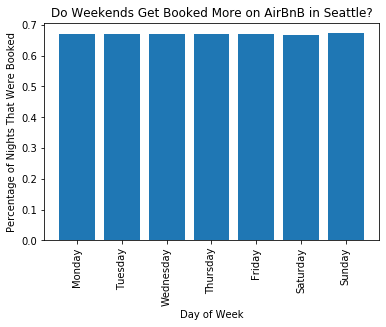

In [131]:
#(CalendarCleaned.WeekEnd.value_counts()/CalendarCleaned.shape[0]).plot(kind = "bar")
#print(CalendarCleaned.WeekEnd.value_counts())
#df.plot( kind = "bar");
plt.bar(df.index, df["Percentage"]);
plt.xticks(ticks=range(len(df)), labels=df.index, rotation=90);
plt.ylabel('Percentage of Nights That Were Booked');
plt.xlabel('Day of Week');
plt.title("Do Weekends Get Booked More on AirBnB in Seattle?");
#df.ylabel('WeekDay')